In [141]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [142]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Homework

> Note: sometimes your answer doesn't match one of the options exactly.
> That's fine.
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).


In [143]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [144]:
categories = ['lead_source', 'industry', 'employment_status', 'location']



Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0


In [145]:
data.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [146]:
data[['lead_source','industry', 'employment_status', 'location']] = data[['lead_source','industry', 'employment_status', 'location']].fillna(value='NA')
data[['annual_income']] = data[['annual_income']].fillna(value=0.0)
data.isnull().sum()
data.describe()



lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,52472.172367,2.976744,0.506108,0.619015
std,1.449717,24254.347030,1.681564,0.288465,0.485795
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,44097.250000,2.000000,0.262500,0.000000
50%,2.000000,57449.500000,3.000000,0.510000,1.000000
75%,3.000000,68241.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000




### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`



In [147]:
data['industry'].mode()

0    retail
Name: industry, dtype: object



### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score (0.01)
- `number_of_courses_viewed` and `lead_score` (-0.005)
- `number_of_courses_viewed` and `interaction_count (-0.024)
- `annual_income` and `interaction_count` (0.027)

Only consider the pairs above when answering this question.


<Axes: >

,interaction_count,lead_score,number_of_courses_viewed,annual_income
interaction_count,1.000000,0.009888,-0.023565,0.027036
lead_score,0.009888,1.000000,-0.004879,0.015610
number_of_courses_viewed,-0.023565,-0.004879,1.000000,0.009770
annual_income,0.027036,0.015610,0.009770,1.000000


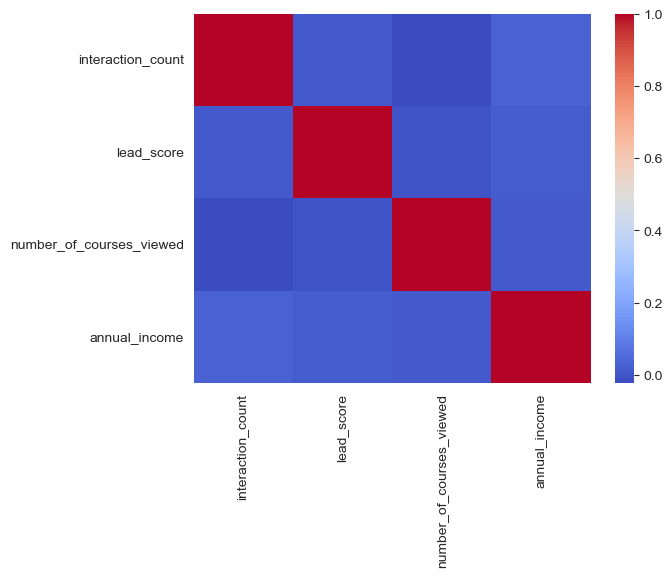

In [148]:
matrix = data[['interaction_count', 'lead_score', 'number_of_courses_viewed', 'annual_income']].corr()
sns.heatmap(matrix, cmap='coolwarm')
matrix



### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.


In [149]:
df_full_train_val, df_full_test = train_test_split(data, test_size=0.2, random_state=42)
df_full_train, df_full_val = train_test_split(df_full_train_val, test_size=0.25, random_state=42)

df_test_y = df_full_test['converted']
df_test = df_full_test.drop('converted', axis=1)

df_train_y = df_full_train['converted']
df_train = df_full_train.drop('converted', axis=1)

df_val_y = df_full_val['converted']
df_val = df_full_val.drop('converted', axis=1)

print(f'{len(df_test)}  {len(df_train)}  {len(df_val)}')


293  876  293


In [150]:
df_train_y = df_train_y.values
df_val_y = df_val_y.values
df_test_y = df_test_y.values

df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)





### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?

- `industry`
- `location`
- `lead_source`
- `employment_status`


In [151]:
print(f"industry: {mutual_info_score(df_train['industry'], df_train_y)}")
print(f"location: {mutual_info_score(df_train['location'], df_train_y)}")
print(f"lead_source: {mutual_info_score(df_train['lead_source'], df_train_y)}")
print(f"employment_status: {mutual_info_score(df_train['employment_status'], df_train_y)}")

industry: 0.011574521435657112
location: 0.004464157884038034
lead_source: 0.03539624379726594
employment_status: 0.012937677269442782


In [152]:
df_train[['industry','location','lead_source','employment_status']].apply(
    lambda col: print(f'{mutual_info_score(col, df_train_y)}')
)

0.011574521435657112
0.004464157884038034
0.03539624379726594
0.012937677269442782


industry             None
location             None
lead_source          None
employment_status    None
dtype: object




### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74
- 0.84
- 0.94

In [153]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, df_train_y)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_val_pred = model.predict_proba(X_val)[:, 1]
y_val_pred_converted = (y_val_pred >= 0.5).astype(int)
accuracy_original = (df_val_y == y_val_pred_converted).mean()
round(accuracy_original,2)
print(accuracy_original)




,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


np.float64(0.7)

0.6996587030716723




### Question 5

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.

In [154]:
df_train.head(10)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,retail,0,58472.0,student,middle_east,5,0.03
1,organic_search,manufacturing,3,71738.0,student,middle_east,6,0.77
2,paid_ads,technology,3,81973.0,employed,north_america,2,0.59
3,NA,technology,1,74956.0,employed,europe,3,0.34
4,organic_search,retail,3,59335.0,student,australia,1,0.98
5,social_media,retail,4,50961.0,student,south_america,1,1.00
6,social_media,finance,0,0.0,unemployed,africa,3,0.73
7,events,retail,3,45170.0,student,middle_east,3,0.38
8,organic_search,NA,0,73717.0,employed,asia,2,0.28
9,organic_search,education,2,61872.0,student,australia,1,0.01


In [155]:
df_train.columns

for feature in ['industry', 'employment_status', 'lead_score']:
    new_dv = DictVectorizer(sparse=False)

    df_train_temp = df_train.drop(feature, axis=1)
    train_dicts = df_train_temp.to_dict(orient='records')
    X_train = new_dv.fit_transform(train_dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, df_train_y)

    df_val_temp = df_val.drop(feature, axis=1)
    val_dicts = df_val_temp.to_dict(orient='records')
    X_val = new_dv.transform(val_dicts)

    y_val_pred = model.predict_proba(X_val)[:, 1]
    y_val_pred_converted = (y_val_pred >= 0.5).astype(int)
    accuracy = (df_val_y == y_val_pred_converted).mean()
    print(f'difference between full set and full set without {feature}: {accuracy_original - accuracy}')

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score'],
      dtype='object')

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


difference between full set and full set without industry: 0.0


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


difference between full set and full set without employment_status: 0.0034129692832763903


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


difference between full set and full set without lead_score: -0.0068259385665528916




### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [157]:
train_dicts_loop = df_train.to_dict(orient='records')
type(train_dicts_loop)
dv_loop = DictVectorizer(sparse=False)
X_train_loop = dv_loop.fit_transform(train_dicts_loop)

val_dicts_loop = df_val.to_dict(orient='records')
X_val_loop = dv_loop.transform(val_dicts_loop)

for c in [0.01, 0.1, 1, 10, 100]:


    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train_loop, df_train_y)

    y_val_pred = model.predict_proba(X_val_loop)[:, 1]
    y_val_pred_converted = (y_val_pred >= 0.5).astype(int)
    accuracy_c = (df_val_y == y_val_pred_converted).mean()
    print(f'accuracy for c={c}: {round(accuracy_c,3)}')


list

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


accuracy for c=0.01: 0.7


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


accuracy for c=0.1: 0.7


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


accuracy for c=1: 0.7


,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


accuracy for c=10: 0.7


,penalty,'l2'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


accuracy for c=100: 0.7



## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw03
* If your answer doesn't match options exactly, select the closest one